In [137]:
#!pip install newsapi-python
#https://newsapi.org/docs/endpoints/everything

from newsapi import NewsApiClient #importing the newsapi library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from string import punctuation
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
import nltk
import numpy as np

In [138]:
#Running the python script containing API keys
#%run C:\\Users\\korupos\\Documents\\FLShots\\key.ipynb
%run C:\\Users\\samrat\\Desktop\\US\\Spring2021\\TextAnalytics\\key.ipynb

In [139]:
#Initialize API
newsapi = NewsApiClient(api_key= news_api)

# /v2/sources
#sources = newsapi.get_sources()

# /v2/top-headlines
#top_headlines = newsapi.get_top_headlines(q='florida +vaccine',language='en', country = 'us')

# /v2/everything
all_articles = newsapi.get_everything(q = 'florida + vaccine', from_param='2021-03-01',
                                      to='2021-03-29', language='en', sort_by='relevancy', page=1, page_size = 100)

In [140]:
print(all_articles.keys())
print('Total articles : ' + str(all_articles['totalResults']))

dict_keys(['status', 'totalResults', 'articles'])
Total articles : 3331


In [141]:
all_articles

{'status': 'ok',
 'totalResults': 3331,
 'articles': [{'source': {'id': None, 'name': 'Gizmodo.com'},
   'author': 'Whitney Kimball',
   'title': "Republicans' Rich White Friends Will Outlive Us All",
   'description': 'Barring a series of increasingly tragic disasters, we’ll probably be hearing about pandemic-related political favors and mind-melting incompetence for years. Early signs also indicate that we’re in for an exhibition of bipartisan jockeying for the role of pan…',
   'url': 'https://gizmodo.com/republicans-rich-white-friends-will-outlive-us-all-1846433057',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/cayy7lxjnsdf8wl1ls5c.jpg',
   'publishedAt': '2021-03-09T19:40:00Z',
   'content': 'Barring a series of increasingly tragic disasters, well probably be hearing about pandemic-related political favors and mind-melting incompetence for years. Early signs also indicate that were in for… [+6313 c

In [7]:
#List of news sources 

print('Total sources :' + str(len(sources['sources'])))
print()
for i in range(len(sources['sources'])):
    print(i+1, sources['sources'][i]['name'])

Total sources :128

1 ABC News
2 ABC News (AU)
3 Aftenposten
4 Al Jazeera English
5 ANSA.it
6 Argaam
7 Ars Technica
8 Ary News
9 Associated Press
10 Australian Financial Review
11 Axios
12 BBC News
13 BBC Sport
14 Bild
15 Blasting News (BR)
16 Bleacher Report
17 Bloomberg
18 Breitbart News
19 Business Insider
20 Business Insider (UK)
21 Buzzfeed
22 CBC News
23 CBS News
24 CNN
25 CNN Spanish
26 Crypto Coins News
27 Der Tagesspiegel
28 Die Zeit
29 El Mundo
30 Engadget
31 Entertainment Weekly
32 ESPN
33 ESPN Cric Info
34 Financial Post
35 Focus
36 Football Italia
37 Fortune
38 FourFourTwo
39 Fox News
40 Fox Sports
41 Globo
42 Google News
43 Google News (Argentina)
44 Google News (Australia)
45 Google News (Brasil)
46 Google News (Canada)
47 Google News (France)
48 Google News (India)
49 Google News (Israel)
50 Google News (Italy)
51 Google News (Russia)
52 Google News (Saudi Arabia)
53 Google News (UK)
54 Göteborgs-Posten
55 Gruenderszene
56 Hacker News
57 Handelsblatt
58 IGN
59 Il Sole 2

In [142]:
sam_df = pd.DataFrame(all_articles['articles'])
#news_df = pd.read_csv("florida_vaccine_news1c.csv")

## WordCloud of Pos/Neg/Neutral corpus

In [45]:
for column in news_df.columns:
    if column == ('title' or 'description' or 'content'):
        news_df[column] = news_df[column].str.lower().str.replace('[^a-z]+',' ')

In [89]:
positive_corpus = []
negative_corpus = []
neutral_corpus = []
for i in range(len(news_df)):
    if news_df['Polarity'][i] == 0:
        neutral_corpus.append(news_df['title'][i])
        neutral_corpus.append(news_df['description'][i])
        neutral_corpus.append(news_df['content'][i])
    elif news_df['Polarity'][i] < 0:
        negative_corpus.append(news_df['title'][i])
        negative_corpus.append(news_df['description'][i])
        negative_corpus.append(news_df['content'][i])
    elif news_df['Polarity'][i] > 0:
        positive_corpus.append(news_df['title'][i])
        positive_corpus.append(news_df['description'][i])
        positive_corpus.append(news_df['content'][i])

In [132]:
#custom list of stopwords
stopwordsList = []
stopwordsList = stopwords.words('english')
stopwordsList.append('covid')
stopwordsList.append('new')
stopwordsList.append('vaccines')
stopwordsList.append('vaccination')
stopwordsList.append('florida')
stopwordsList.append('coronavirus')
stopwordsList.append('chars')
stopwordsList.append('reuters')
stopwordsList.append('state')
stopwordsList.append('states')
stopwordsList.append('year')
stopwordsList.append('york')
stopwordsList.append('california')
stopwordsList.append('texas')

In [133]:
neutral_corpus = " ".join(neutral_corpus)
neutral_corpus = neutral_corpus.split()
neutral_corpus = [x for x in neutral_corpus if x not in stopwordsList and len(x) > 2]

negative_corpus = " ".join(negative_corpus)
negative_corpus = negative_corpus.split()
negative_corpus = [x for x in negative_corpus if x not in stopwordsList and len(x) > 2]

positive_corpus = " ".join(positive_corpus)
positive_corpus = positive_corpus.split()
positive_corpus = [x for x in positive_corpus if x not in stopwordsList and len(x) > 2]

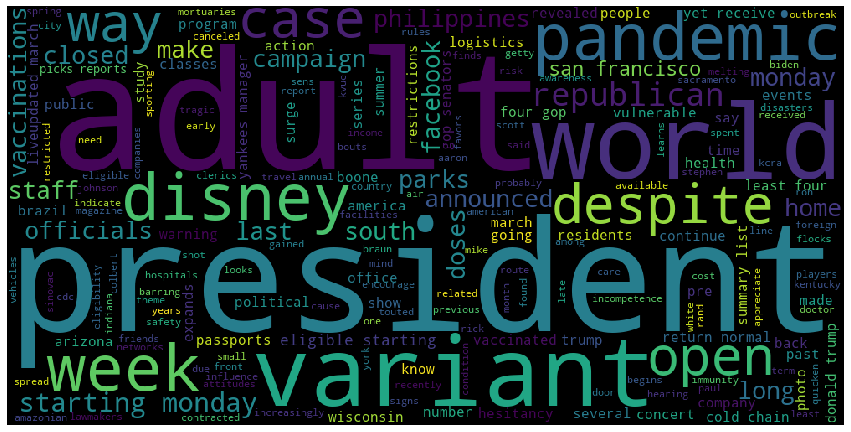

In [129]:
unique_string=(" ").join(negative_corpus)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

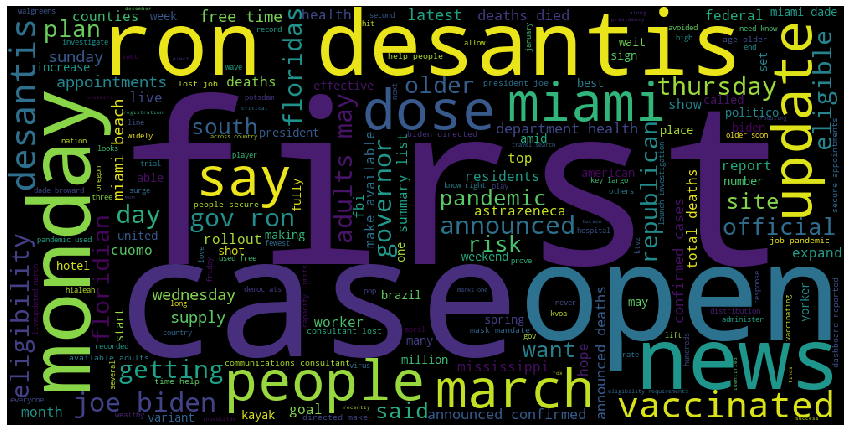

In [134]:
unique_string=(" ").join(positive_corpus)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

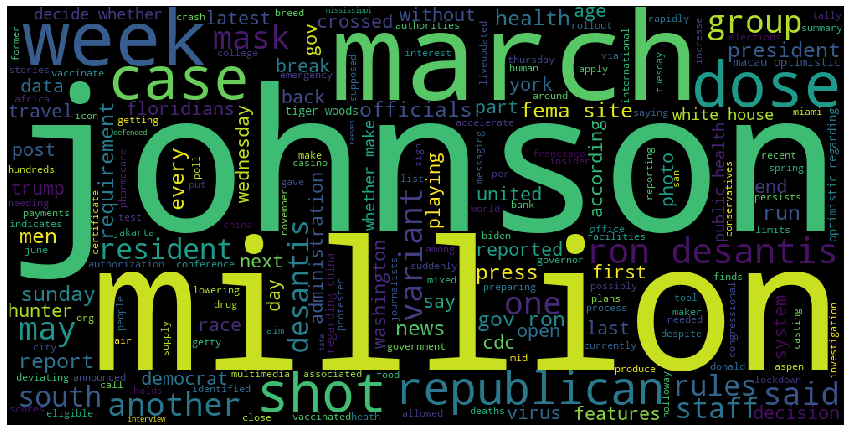

In [131]:
unique_string=(" ").join(neutral_corpus)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

## Cleaning

In [17]:
blobs_title = []                #This list holds the cleaned tweets

for i in range(len(news_df)):
    title = news_df['title'][i]
    title = title.strip(punctuation).lower()
    title = re.sub(r'http\S+', ' ', title)
    title = re.sub(r'@\S+', ' ', title)
    title = re.sub(r'#', '', title)
    title = re.sub(r'[^a-z]+', ' ', title)
    title = re.sub(r'rt', ' ', title)
    
    blobs_title.append(title)

In [143]:
blobs_content = []                #This list holds the cleaned tweets

for i in range(len(sam_df)):
    content = news_df['content'][i]
    content = content.strip(punctuation).lower()
    content = re.sub(r'http\S+', ' ', content)
    content = re.sub(r'@\S+', ' ', content)
    content = re.sub(r'#', '', content)
    content = re.sub(r'[^a-z]+', ' ', content)
    content = re.sub(r'rt', ' ', content)
    
    blobs_content.append(content)

## Model 1 : TextBlob

In [144]:
polarity = []
subjectivity = []

for i in range(len(blobs_content)):
    xyz = TextBlob(blobs_content[i])
    polarity.append(xyz.sentiment.polarity)
    subjectivity.append(xyz.sentiment.subjectivity)

In [145]:
sam_df['Polarity'] = polarity

## Model 2 : Vader

In [146]:
analyzer = SentimentIntensityAnalyzer()
sentiment = {}
pol = [0]*len(sam_df)
    
for i in range(len(sam_df)):
    content = sam_df['content'][i]
    sentiment[i] = analyzer.polarity_scores(content)
    pol[i] = sentiment[i]['compound']
sam_df['Polarity_1'] = pol

## Results

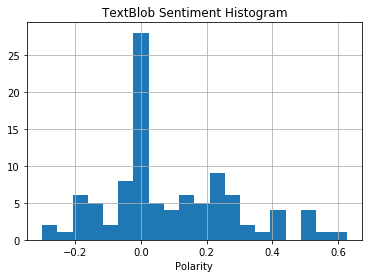

Total Articles : 100
Neutral Articles : 23
Positive Articles : 51
Negative Articles : 26


In [148]:
news_df['Polarity'].hist(bins=20)
plt.title('TextBlob Sentiment Histogram')
plt.xlabel('Polarity')
plt.show()
print('Total Articles : ' + str(len(sam_df)))
print('Neutral Articles : ' + str((sam_df['Polarity'] == 0).sum()))
print('Positive Articles : ' + str((sam_df['Polarity'] > 0).sum()))
print('Negative Articles : ' + str((sam_df['Polarity'] < 0).sum()))

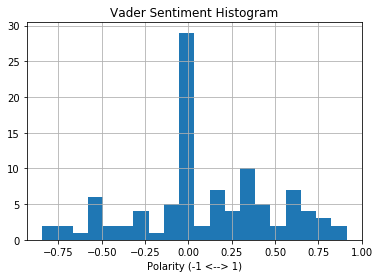

Total Articles : 100
Neutral : 28
Positive : 46
Negative : 26


In [149]:
news_df['Polarity_1'].hist(bins=20)
plt.title('Vader Sentiment Histogram')
plt.xlabel('Polarity (-1 <--> 1)')
plt.show()
print('Total Articles : ' + str(len(sam_df)))
print('Neutral : ' + str((sam_df['Polarity_1'] == 0).sum()))
print('Positive : ' + str((sam_df['Polarity_1'] > 0).sum()))
print('Negative : ' + str((sam_df['Polarity_1'] < 0).sum()))

In [150]:
#news_df.to_csv('florida_vaccine_news1c.csv',index=False,encoding='utf-8')
sam_df.to_csv('sam_news.csv',index=False,encoding='utf-8')

In [56]:
for i in range(len(news_df)):
    if news_df['Polarity'][i] == 0:
        print(news_df['title'][i])

fema vaccine site abandoned state rules gave vaccine to any resident and older
s africa s aspen pharmacare to supply j j s covid vaccine by end june reuters
u s study finds astrazeneca s vaccine to be effective
gov desantis announces when florida s covid vaccine age will drop to and then to 
 nd democrat calls for investigation of desantis s vaccine distribution
the latest wh vaccine doses to increase to m a week the associated press
florida sunday covid update deaths each person a resident and new cases
u s stimulus payments have begun reaching bank accounts
u s covid cases top million as states race to vaccinate reuters
trump to decide on whether to make another white house run after midterms reuters canada
spring break no masks and cinemas us reopening faster than uk despite lagging in vaccination race
 million vaccine doses per day could boost employment by more than million report finds
 why would you not alarm as republican men say they won t get covid vaccine
more aggressive vir

KeyError: 'name'